In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

all_stats = pd.read_csv('../python_project_csv_files/2019-20_pbp.csv', header = [0])

pd.set_option("display.max_columns", None)

some_stats = all_stats[['GameType','WinningTeam','Quarter','AwayTeam','AwayPlay','HomeTeam','HomePlay','Shooter','ShotType','ShotOutcome','ShotDist']]
shooting = some_stats[some_stats['Shooter'].notna()].reset_index().drop(columns = 'index')
two_point_shots = shooting[shooting['ShotType'].str.contains('2')].reset_index().drop(columns = 'index')
three_point_shots = shooting[shooting['ShotType'].str.contains('3')].reset_index().drop(columns='index')
all_shots = shooting[shooting['ShotType'].str.contains('2|3')].reset_index().drop(columns = 'index')
all_shots['ShotType'] = all_shots['ShotType'].apply(lambda row: '3PT' if '3-pt' in row else '2PT')
shot_makes = shooting[shooting['ShotOutcome'] == 'make'].reset_index().drop(columns = 'index')
shot_makes_dist = shot_makes['ShotDist']
all_shots_dist = shooting['ShotDist']

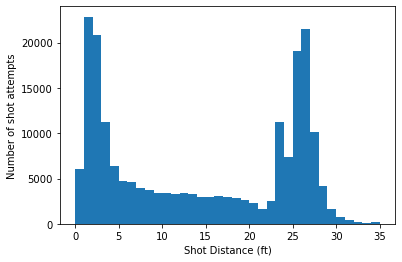

In [2]:
plt.hist(all_shots_dist, bins = 35, range = (0,35))
plt.xlabel('Shot Distance (ft)')
plt.ylabel('Number of shot attempts')
plt.savefig('shot_attempts_vs_distance.png')

In [3]:
two_point_shots = two_point_shots.loc[two_point_shots['ShotDist'] <= 24]
fg_percent_2pt = pd.DataFrame(two_point_shots.groupby(['ShotDist','ShotOutcome'])['ShotOutcome'].count().groupby('ShotDist').apply(lambda x: x/sum(x))).rename(columns={'ShotOutcome':'fg_percent'})
fg_percent_2pt = fg_percent_2pt[fg_percent_2pt.index.get_level_values('ShotOutcome') == 'make']
fg_percent_2pt = fg_percent_2pt.reset_index().drop(columns = 'ShotOutcome')

In [4]:
three_point_shots = three_point_shots.loc[(three_point_shots['ShotDist'] >= 22) & (three_point_shots['ShotDist'] <= 40)]
fg_percent = pd.DataFrame(three_point_shots.groupby(['ShotDist','ShotOutcome'])['ShotOutcome'].count().groupby('ShotDist').apply(lambda x: x/sum(x))).rename(columns={'ShotOutcome':'fg_percent'})
#fg_percent[fg_percent.index.contains('make')]
fg_percent = fg_percent[fg_percent.index.get_level_values('ShotOutcome') == 'make']
fg_percent = fg_percent.reset_index().drop(columns = 'ShotOutcome')
fg_percent['efg_percent'] = (fg_percent['fg_percent'] * 1.5)

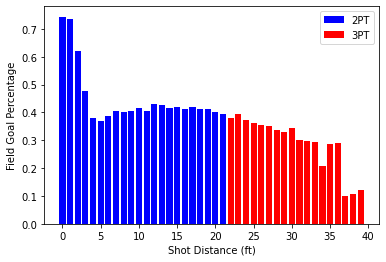

In [5]:
plt.bar(fg_percent_2pt['ShotDist'],fg_percent_2pt['fg_percent'],color='b',label='2PT')
plt.bar(fg_percent['ShotDist'],fg_percent['fg_percent'],color='r',label='3PT')
plt.xlabel('Shot Distance (ft)')
plt.ylabel('Field Goal Percentage')
plt.legend()
plt.savefig('field_goal_percent_vs_distance.png')

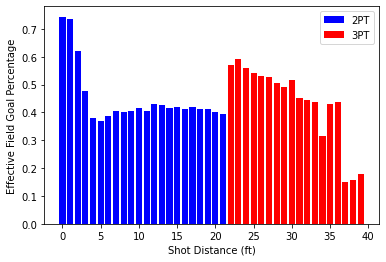

In [6]:
plt.bar(fg_percent_2pt['ShotDist'],fg_percent_2pt['fg_percent'],color='b',label='2PT')
plt.bar(fg_percent['ShotDist'],fg_percent['efg_percent'],color='r',label='3PT')
plt.xlabel('Shot Distance (ft)')
plt.ylabel('Effective Field Goal Percentage')
plt.legend()
plt.savefig('effective_field_goal_percent_vs_distance.png')